# Final Exam

In [98]:
import numpy as np
import sympy as sm
from sympy import UnevaluatedExpr as uneval
from IPython.display import display, Math
from sympy.physics.vector.printing import vlatex

import massParam

## Part 1: Equations of Motion for Simulating Dynamics

###  1.1 (3 points) Using the configuration variable q = x1, find the kinetic energy of the system.

In [99]:
# define variables
t = sm.symbols(r't')
x1 = sm.symbols(r'x_1', cls=sm.Function)
x1 = x1(t)
x1d, x1dd = x1.diff(t), x1.diff(t, 2)

k1, k2, c, m = sm.symbols(r'k_1 k_2 c m', real=True, positive=True)

In [100]:
# define kinetic energy
K = uneval(sm.Rational(1,2)) * uneval(m * x1d**2)

print('Kinetic energy: ')
display(Math(r'K = ' + vlatex(K)))

Kinetic energy: 


<IPython.core.display.Math object>

### 1.2 (3 points) Find the potential energy for the system.

In [101]:
V_spring = sm.Rational(1,2) * k1 * x1**2 + sm.Rational(1,4) * k2 * x1**4

print('Potential energy of spring:')
display(Math(r'V_{spring} = ' + vlatex(V_spring)))

Potential energy of spring:


<IPython.core.display.Math object>

In [102]:
# define other potential energy (ignore offset, assume datum is at equilibrium)
g = sm.symbols(r'g', real=True, positive=True)

P_mass = m*g*-x1

print('Potential energy of mass (sign is negative because x1 points down)')
display(Math(r'P_{mass} = ' + vlatex(P_mass)))

Potential energy of mass (sign is negative because x1 points down)


<IPython.core.display.Math object>

In [103]:
# find total potential energy
P = V_spring + P_mass

display(Math(r'P = ' + vlatex(P)))

<IPython.core.display.Math object>

###  1.3 (3 points) Find the Lagrangian $L = K −P$.

In [104]:
# Determine the lagrangian
L = K - P
L = L.simplify()

display(Math(r'L = ' + vlatex(L)))

<IPython.core.display.Math object>

###  1.4 (3 points) Find the generalized forces $\tau - B\dot q$.

In [105]:
F, b = sm.symbols(r'F b')

f_nonlinearfric = c*sm.sign(x1d)

tau = F
Bqdot = b*x1d + f_nonlinearfric

display(Math(r'\tau = ' + vlatex(tau) +\
             r', \quad B \dot q =' + vlatex(Bqdot)))

print('Non generalized forces:')
display(Math(r'\tau - B \dot q = ' + vlatex(tau - Bqdot)))


<IPython.core.display.Math object>

Non generalized forces:


<IPython.core.display.Math object>

###  1.5 (8 points) Derive the equations of motion using the Euler-Lagrange equations.

In [106]:
def derive_Lagrangian(L, q, q_dot):
    term_1 = (L.diff(q_dot)).diff(t)
    term_2 = L.diff(q)
    return term_1 - term_2

In [107]:
# Solve the lagrangian (EL for Euler Lagrange)
EL = sm.Eq(derive_Lagrangian(L, x1, x1d), tau - Bqdot)

print('Equations of motion derived by Euler-Lagrange:')
display(Math(r'\text{EOM}:' + vlatex(EL)))

Equations of motion derived by Euler-Lagrange:


<IPython.core.display.Math object>

## Part 2: Models for Control Design

The figure below shows a mass on a fixed inclined plane connected to a nonlinear spring and a linear damper and
 the equation of motion is the following:

 $$
m \ddot z + k_1 z + k_2 z^3 - \frac{1}{\sqrt{2}} m g = F - b \dot z
 $$

 The damping coefficient is $b = 0.1$. The physical parameters of the system are $g = 9.8$ meters per second,
 $\theta =45$ degrees, $m = 0.5 kg$, $k_1 = 0.05$, and $k_2 = 0.02$. The input force $F$ is limited to $\pm 5.0$ Newtons.

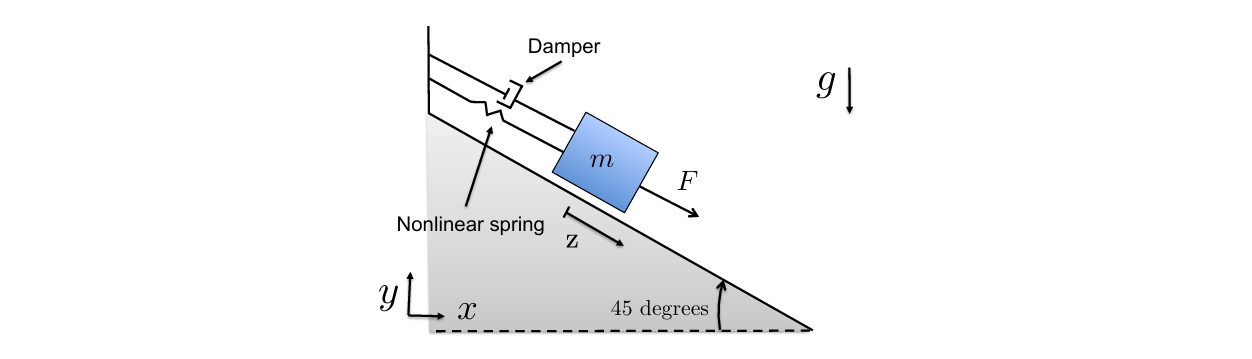

 For this problem, use the following files to implement the simulation: ```finalSim2.py```, ```massDynamics.py```. The
 objective of this part is to use the equations of motion to find the appropriate models that will be used to
 design the feedback control strategies. If you CANNOT get the dynamics to work, you can instead use the file
 “massDynamicsCompiled.py,” but you will take a 10 point deduction by using that file instead of writing your
 own dynamics for the rest of the exam.

### 2.1 (3 points) Suppose that the objective is to linearize the system around the equilibrium position $z_e$. Find the associated equilibrium force $F_e$ so that $z_e$ is an equilibrium of the system.

In [108]:
# redefine eom
z = sm.symbols(r'z', cls=sm.Function)
z = z(t)
zd, zdd = z.diff(t), z.diff(t, 2)

eom = sm.Eq(m*zdd + k1*z + k2*z**3 - 1/sm.sqrt(2) * m*g, F - b*zd)
print('equations of motion')
display(Math(vlatex(eom)))

print('solve for F')
eom_F = sm.solve(eom, F)[0]
display(Math(r'F=' + vlatex(eom_F)))

print('solve for zddot:')
display(Math(r'\ddot z = ' + vlatex(sm.solve(eom, zdd)[0] )))

equations of motion


<IPython.core.display.Math object>

solve for F


<IPython.core.display.Math object>

solve for zddot:


<IPython.core.display.Math object>

Taylor series approximaiton:

$$
g(w) \approx g(w_0) + \frac{\partial g}{\partial w} \bigg|_{w_0} (w - w_0)
$$

In [109]:
# take the taylor series approximation
ze = sm.symbols(r'z_e', real=True)
z_tilde = sm.symbols(r'\tilde{z}', cls=sm.Function)
z_tilde = z_tilde(t)
z_tilded, z_tildedd = z_tilde.diff(t), z_tilde.diff(t, 2)

eom_equib = eom_F.subs({z: ze}) + sm.diff(eom_F, z).subs({z: ze}) * z_tilde
eom_equib = eom_equib.simplify()

eom_equib = eom_equib.collect([z, ze])

print('equilibrium equation:')
display(Math(r'F_e = ' + vlatex(eom_equib)))

print('finally, sub in ze = 0:')

eom_equib = eom_equib.subs({ze: 0, z: 0, z_tilde: 0})
display(Math(r'F_e = ' + vlatex(eom_equib)))

equilibrium equation:


<IPython.core.display.Math object>

finally, sub in ze = 0:


<IPython.core.display.Math object>

### 2.2 (6 points) Create a “controller”: 
(At this point it is mostly just a simulation of the equilibrium conditions) that places a constant force of Fe on the physical system. In the simulation files, set the initial conditions
 to z(0) = ze and ˙ z(0) = 0 to verify that the equilibrium force is correct. For this problem you may assume
 that ze = 0. Insert a plot of the output of the system with initial condition z(0) = ze = 0 and an
 input of Fe in the associated Word document.

In [110]:
# See other code for implementation!

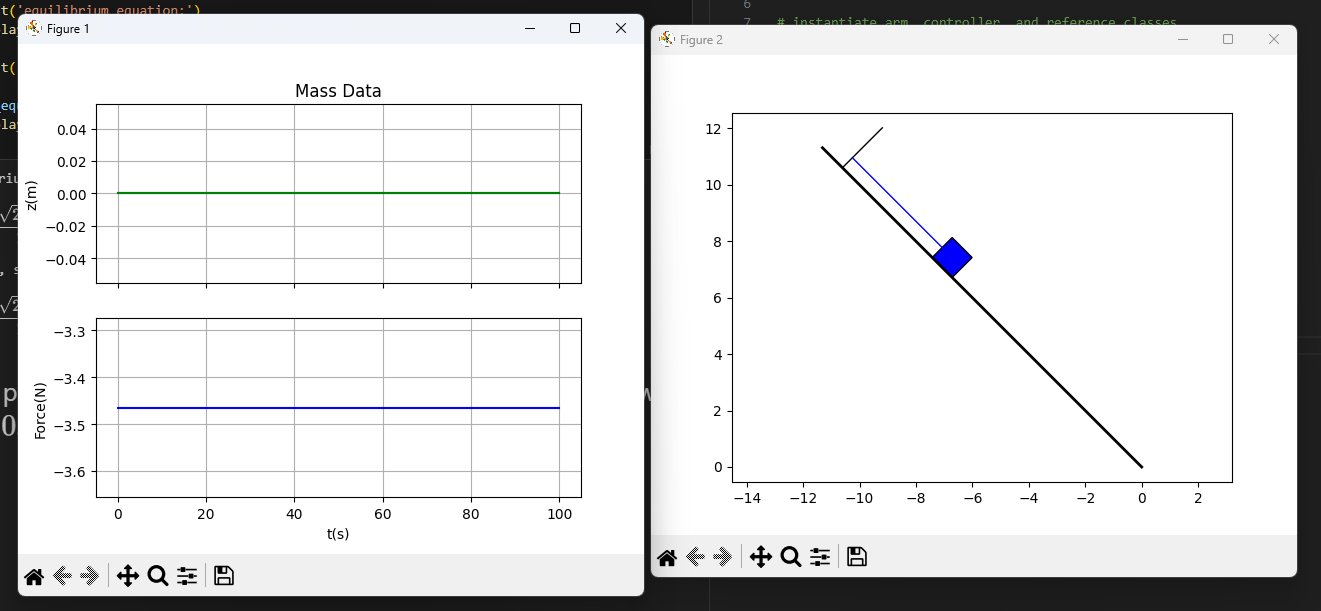

### 2.3 (5 points) Linearize the model around the equilibrium $(z_e, F_e)$, for $z_e \ne 0$ and report your linearized model.

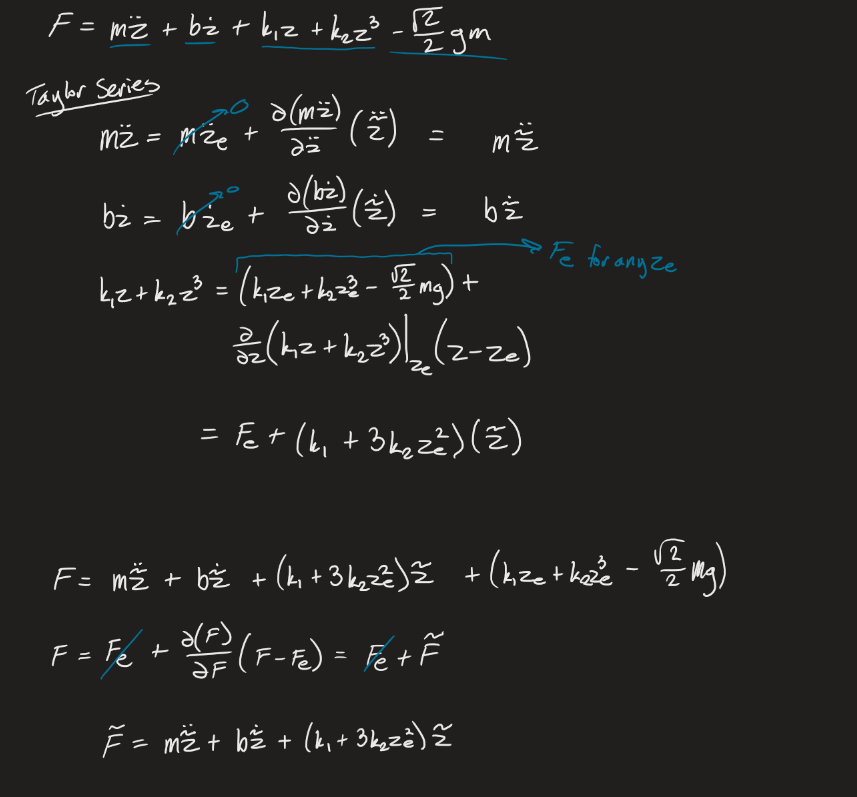

old code hidden in this markdown cell

<!-- # # solve eom for 0:
# display(Math(vlatex(eom)))
# eom0 = eom.lhs - eom.rhs
# display(Math(vlatex(eom0)))

# # redefine code taken above
# ze = sm.symbols(r'z_e', cls=sm.Function)
# ze = ze(t)
# z_tilde = sm.symbols(r'\tilde{z}', cls=sm.Function)
# z_tilde = z_tilde(t)
# z_tilded, z_tildedd = z_tilde.diff(t), z_tilde.diff(t, 2)

# eom_equib = eom0.subs({z: ze}) + sm.diff(eom0, z).subs({z: ze}) * z_tilde
# # eom_equib = eom_equib.simplify()

# eom_equib = eom_equib.collect([z, ze])

# print('equilibrium equation:')
# display(Math(r'0 = ' + vlatex(eom_equib)))

# print('finally, sub in ze = 0:')

# eom_equib = eom_equib.subs({ze: 0, z: 0})
# display(Math(r'0 = ' + vlatex(eom_equib))) -->

###  2.4 (3 points) Find the transfer function of the linearized model when $z_e = 0$.

In [111]:
# linearized function:
zt = sm.symbols(r'\tilde{z}', cls=sm.Function)(t)
ztd, ztdd = zt.diff(t), zt.diff(t, 2)

eom_lin = sm.Eq(F, m*ztdd + b*ztd + k1*zt - sm.sqrt(2)/2 * m*g)
eom_lin

Eq(F, b*Derivative(\tilde{z}(t), t) - sqrt(2)*g*m/2 + k_1*\tilde{z}(t) + m*Derivative(\tilde{z}(t), (t, 2)))

###  2.5 (3 points) Find a state-space model for the system linearized around $z_e$, $F_e$ when $z_e = 0$. For your states use $x =(\tilde z, \dot{\tilde z})^⊤$, in that order.

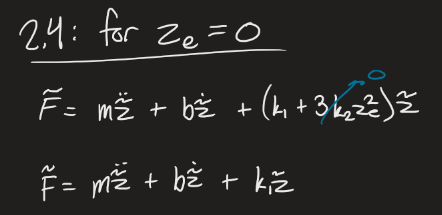

In [112]:
Ft = sm.symbols(r'\tilde{F}')

eom_lin = sm.Eq(Ft, m*ztdd + b*ztd + k1*zt)
display(Math(vlatex(eom_lin)))

print(r'solve for \tilde \ddot z:')
eom_lin = sm.solve(eom_lin, ztdd)[0]
display(Math(r'\ddot{\tilde{z}} = ' + vlatex(eom_lin)))

<IPython.core.display.Math object>

solve for \tilde \ddot z:


<IPython.core.display.Math object>

In [113]:
# define state space vector
x = sm.Matrix([zt, ztd])
display(Math(r'x = ' + vlatex(x)))

xd = sm.Matrix([ztd, eom_lin])
display(Math(r'\large \dot x = ' + vlatex(xd)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

###  2.6 Did you write your own dynamics, or did you use the compiled file? Please insert the dynamics file that you used (if you wrote it) in the associated Word document.

In [114]:
# Yes, I did write it myself. 

## Part 3 

 For this problem, use the following files to implement the simulation: ```finalSim3.py```, ```controllerPID.py```. The
 sampling rate for the controller is $T_s = 0.01$. Use a dirty derivative gain of $\sigma = 0.05$.

###  3.1 (2 points) Using the transfer function derived in Problem 2.4, draw the block diagram for the system using PD control, where the derivative gain multiplies the derivative of the output, and not the derivative of the error.

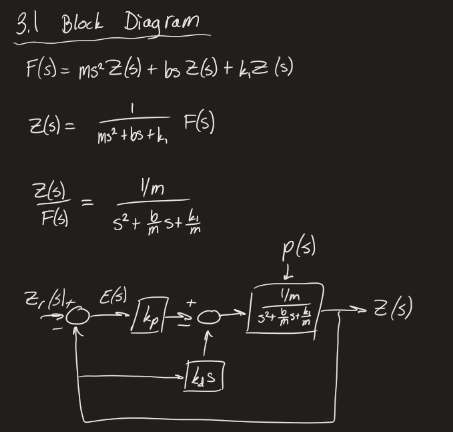

###  3.2 (2 points) Derive and report the closed-loop transfer function from the reference input $z_r$ to the position $z$.

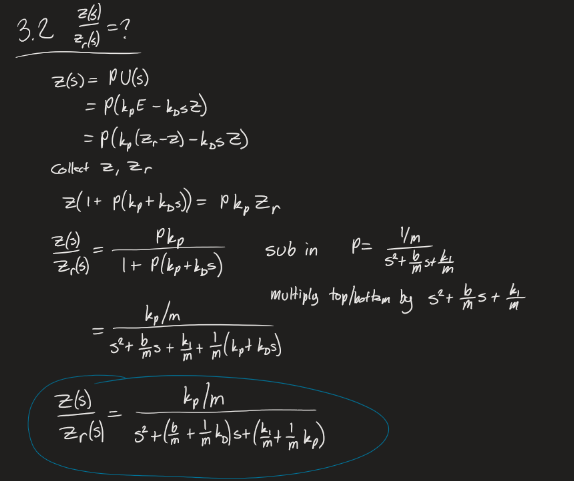

In [115]:
s = sm.symbols(r's')
kp, kd = sm.symbols(r'k_p k_d')

tf = (kp/m) / (s**2 + uneval(b/m + 1/m*kd)*s + uneval(k1/m + 1/m*kp))
tf

k_p*(s**2 + s*(b/m + k_d/m) + (k_1/m + k_p/m))**(-1)/m

In [116]:
# define variable dictionary

vd = {b: massParam.b,
      g: massParam.g,
      m: massParam.m,
      k1: massParam.k1,
      k2: massParam.k2,
      }

print('Transfer Function:')
tf = tf.subs(vd).doit()
tf

Transfer Function:


2.0*k_p/(2.0*k_p + s**2 + s*(2.0*k_d + 0.2) + 0.1)

### 3.3 (2 points) Find the proportional gain $k_p$ so that the control input $F$ saturates at $F_{max} = 5$ Newtons when a step of $1.0$ meter is commanded.

In [117]:
print('define relationship:')
eqn = sm.Eq(sm.numer(tf), massParam.F_max)
display(Math(vlatex(eqn)))

print('Solve for kp:')
vd[kp] = sm.solve(eqn, kp)[0]
display(Math(fr'{kp} = ' + vlatex(vd[kp])))

define relationship:


<IPython.core.display.Math object>

Solve for kp:


<IPython.core.display.Math object>

In [118]:
print('sub back into tf:')

tf = tf.subs(vd)
tf

sub back into tf:


5.0/(s**2 + s*(2.0*k_d + 0.2) + 5.1)

###  3.4 (2 points) If the desired closed loop characteristic polynomial is given by

$$
\Delta ^d_{cl} (s) = s^2 + 2\zeta\omega_n s + \omega_n^2
$$,

find the natural frequency $\omega_n$ and the derivative gain $k_d$ so that the actual closed loop characteristic equation equals the desired closed loop characteristic equation when $\zeta = 0.707$.

In [119]:
print('A reminder of what the transfer function is:')
tf

A reminder of what the transfer function is:


5.0/(s**2 + s*(2.0*k_d + 0.2) + 5.1)

Based on the equation above, $\omega_n^2 = 5.1$.

In [120]:
wn, zeta = sm.symbols(r'\omega_n \zeta')

vd[zeta] = 0.707
display(Math(fr'{zeta} = ' + vlatex(vd[zeta])))

vd[wn] = sm.sqrt(5.1).n(n=4)
display(Math(fr'{wn} = ' + vlatex(vd[wn])))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

And then we have the relationship that:

$$
2\zeta \omega_n = 2k_d + 0.2
$$

This is by setting both terms of $s$ from $\Delta_{cl}^d$ and the transfer func equal to each other. 

In [123]:
eqn = sm.Eq(2*zeta*wn, 2*kd + 0.2)

display(Math(vlatex(eqn)))

print('Solve for kd:')
vd[kd] = sm.solve(eqn, kd)[0]
display(Math(fr'{kd} = ' + vlatex(vd[kd])))

vd[kd] = vd[kd].subs(vd).n(n=4)
display(Math(fr'{kd} = ' + vlatex(vd[kd])))

<IPython.core.display.Math object>

Solve for kd:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

### 3.5 (4 points) Using a dirty derivative, implement PD control, where the input $z_r$ is a square wave with an amplitude of $\pm 0.5$ meters and a frequency of $0.05$ Hertz. Insert a plot in the Word file that shows both $z_r$ and $z$ for $40$ seconds of simulation

In [124]:
# See word document
vd

{b: 0.1,
 g: 9.8,
 m: 0.5,
 k_1: 0.05,
 k_2: 0.02,
 k_p: 2.50000000000000,
 \zeta: 0.707,
 \omega_n: 2.258,
 k_d: 1.497}

###  3.6 (4 points) Add an integrator to remove the steady state error and tune to obtain good transient performance. Insert a plot in the Word file that shows both $z_r$ and $z$ for $40$ seconds of simulation. What is the integrator gain?
 

$$

k_i = 1.75

$$

Many values worked, this one worked best for me. 

###  3.7 (4 points) Insert a copy of the control code (```controllerPID.py```) in the Word document.

Done!

## Part 4: Observer Based Control